In [1]:
__author__='Xia Wang'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
s = json.load(open(os.getenv('PUI2015')+
                   '/plotstyle.json'))
plt.rcParams.update(s)

%matplotlib inline

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = np.load(os.getenv('PUI2015')+
               '/HW6/MTA_Fare.npy')

In [3]:
print data.shape
names=np.array(['10t', '14d', '1d', '2t', '30d', 
                '7d', 'ada', 'afas', 'exp','ez',
                'ff','mc','mr','month','rfm','rr',
                'sen','spec','tcmc','t','umlim',
                'xbus','stud'])

(600, 23, 194)


In [4]:
data_clean = np.where(data != -1, data, np.nan)

In [5]:
by_rt_sum = np.nansum(data, axis=0)

In [6]:
rt = pd.DataFrame(by_rt_sum.T)
rt.index = pd.date_range('5/21/2010',
                          periods=194,freq='W-FRI')

In [7]:
rt.columns = names

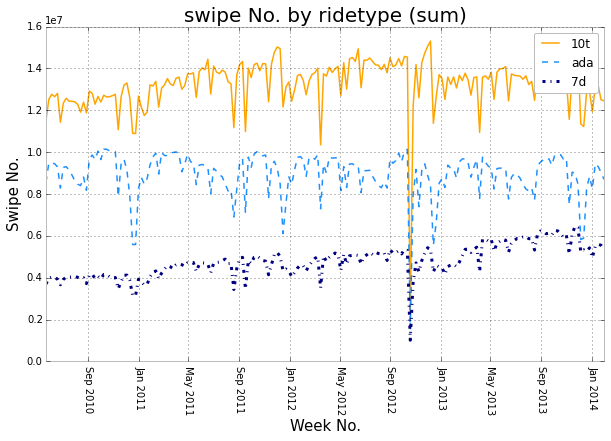

In [8]:
fig1 = plt.figure(figsize = (10,6))
fig1.add_subplot(111)
plt.plot(rt['10t'].index, rt['10t'], c = 'orange',
         label = '10t', lw = 1.5, ls = '-')
plt.plot(rt['ada'].index, rt['ada'], c = 'DodgerBlue',
         label = 'ada', lw = 1.5, ls = '--')
plt.plot(rt['7d'].index, rt['7d'],c = 'Navy',
         label = '7d', lw = 3, ls = '-.')
plt.title('swipe No. by ridetype (sum)',fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No.', fontsize=15)
plt.legend()